## Plot spike trains
-------

Example notebook demonstrating simple functions in SynapticConn for plotting spike trains. 

In [1]:
import os
import pathlib

import numpy as np
import pandas as pd
import scipy.io

os.chdir('../..')
print(os.getcwd())

from synapticonn.plots import plot_acg


/Users/michael.zabolocki/Desktop/code/SynaptiConn


Load data. 

In [2]:
data_fpath = pathlib.Path('tests', 'all_unit.mat')
all_units = scipy.io.loadmat(data_fpath)
all_units.keys()

dict_keys(['__header__', '__version__', '__globals__', 'unit_t'])

Plot spike train.

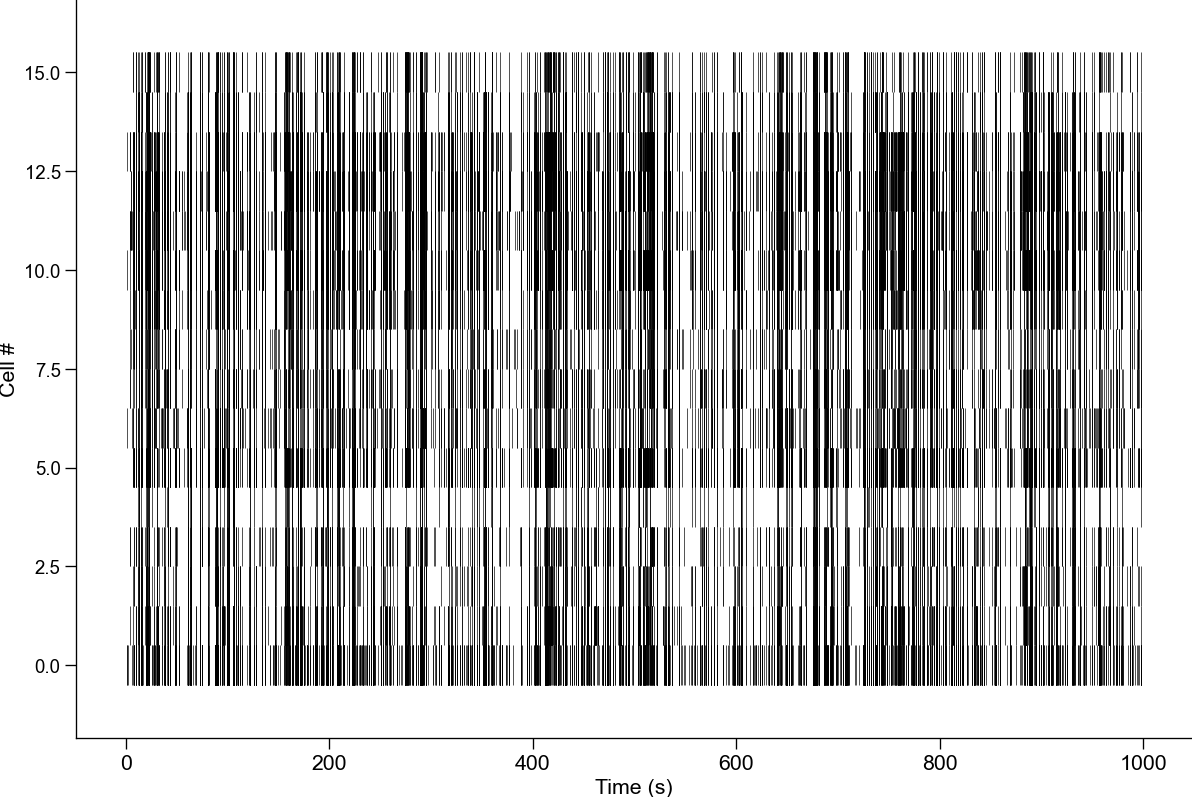

In [3]:
import matplotlib.pyplot as plt

n_cells = all_units['unit_t'].shape[1]

# plot spike trains for each cell
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for cell in range(n_cells):
    ax.eventplot(all_units['unit_t'][0][cell].T, lineoffsets=cell, colors='k', linewidths=0.5)
    
# axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Cell #')

plt.show()

Plot autocorrelograms for individual cells.

(-20.0, 20.0)

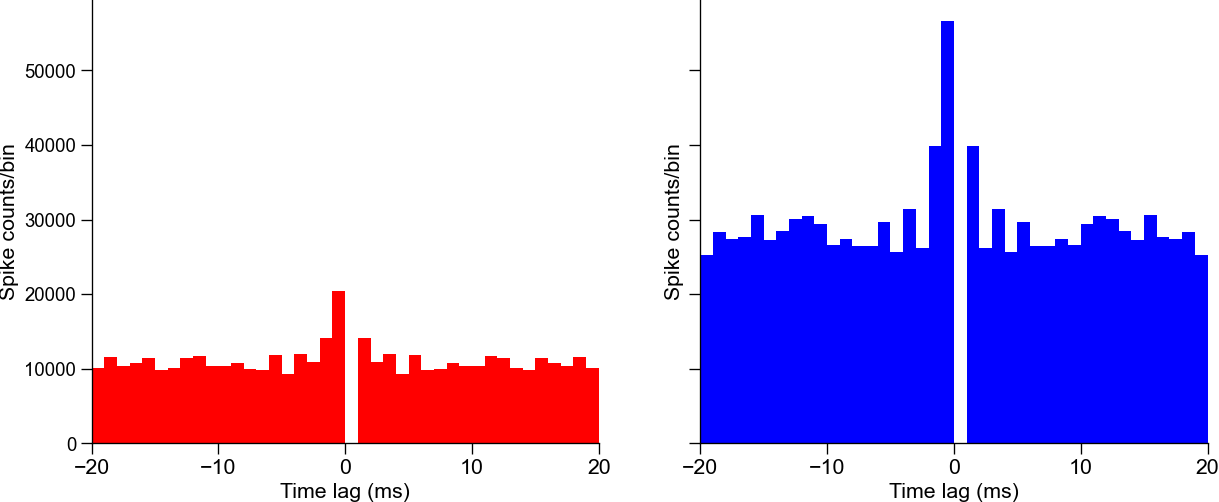

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True, sharex=True)

# bin parameters
bin_size_ms = 1
max_lag_ms = 100

spike_train_1 = all_units['unit_t'][0][0].flatten()  # in milliseconds
plot_acg(spike_train_1, bin_size_ms, max_lag_ms, color='red', ax=ax[0])
ax[0].set_xlim(-20, 20)

spike_train_2 = all_units['unit_t'][0][10].flatten()  # in milliseconds
plot_acg(spike_train_2, bin_size_ms, max_lag_ms, color='blue', ax=ax[1])
ax[1].set_xlim(-20, 20)

TO DO: 
- Plot for multiple spike trains
    - option to subselect for only 1



- Quality controls
    - Build in quality controls to assess the refractory periods (isi violations)
    - Additional QCs?